### Importing Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px

### Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\sivak\New folder\ML\bank.csv")
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
df.describe().T

count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [16]:
df["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [18]:
poutcome_data = df.groupby('poutcome')['loan'].value_counts().reset_index()
print(poutcome_data)

  poutcome loan  count
0  failure   no   1060
1  failure  yes    168
2    other   no    483
3    other  yes     54
4  success   no   1020
5  success  yes     51
6  unknown   no   7139
7  unknown  yes   1187


In [20]:
df.groupby('marital')[['balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration']].value_counts().reset_index()

marital  balance housing loan    contact  day month  duration  count
0      divorced        0     yes   no   cellular    5   may       150      2
1      divorced    -2282     yes  yes   cellular   14   jul       301      1
2      divorced    -2049     yes   no    unknown   30   may       169      1
3      divorced     -978     yes   no   cellular   13   may        62      1
4      divorced     -934     yes   no   cellular   18   nov        50      1
...         ...      ...     ...  ...        ...  ...   ...       ...    ...
11155    single    31868      no   no  telephone   14   aug        34      1
11156    single    34646      no   no  telephone   13   aug       618      1
11157    single    36252     yes   no   cellular   30   apr       501      1
11158    single    45248     yes   no    unknown    6   may      1623      1
11159    single    56831      no   no    unknown   15   may       243      1

[11160 rows x 9 columns]

In [22]:
df.groupby(['contact'])[['loan','poutcome']].value_counts().reset_index()

contact loan poutcome  count
0    cellular   no  unknown   4639
1    cellular   no  failure    985
2    cellular   no  success    932
3    cellular  yes  unknown    796
4    cellular   no    other    435
5    cellular  yes  failure    158
6    cellular  yes    other     49
7    cellular  yes  success     48
8   telephone   no  unknown    496
9   telephone   no  success     83
10  telephone   no  failure     71
11  telephone  yes  unknown     68
12  telephone   no    other     42
13  telephone  yes  failure      8
14  telephone  yes    other      4
15  telephone  yes  success      2
16    unknown   no  unknown   2004
17    unknown  yes  unknown    323
18    unknown   no    other      6
19    unknown   no  success      5
20    unknown   no  failure      4
21    unknown  yes  failure      2
22    unknown  yes    other      1
23    unknown  yes  success      1

In [24]:
cor_data =df[['age','balance','day','duration','campaign']].reset_index()
corr_matrix = cor_data.corr()
print(corr_matrix)

             index       age   balance       day  duration  campaign
index     1.000000 -0.019550 -0.051580  0.041552 -0.454749  0.098562
age      -0.019550  1.000000  0.112300 -0.000762  0.000189 -0.005278
balance  -0.051580  0.112300  1.000000  0.010467  0.022436 -0.013894
day       0.041552 -0.000762  0.010467  1.000000 -0.018511  0.137007
duration -0.454749  0.000189  0.022436 -0.018511  1.000000 -0.041557
campaign  0.098562 -0.005278 -0.013894  0.137007 -0.041557  1.000000


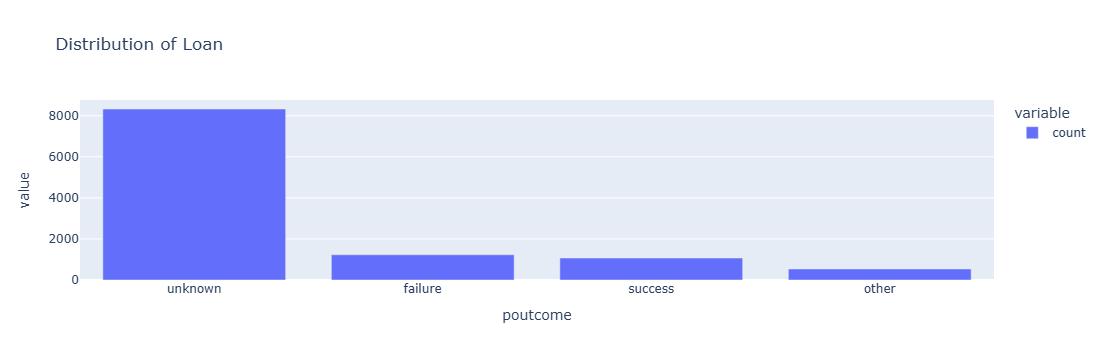

In [26]:
px.bar(df.poutcome.value_counts(), title='Distribution of Loan')

<Axes: xlabel='poutcome', ylabel='count'>

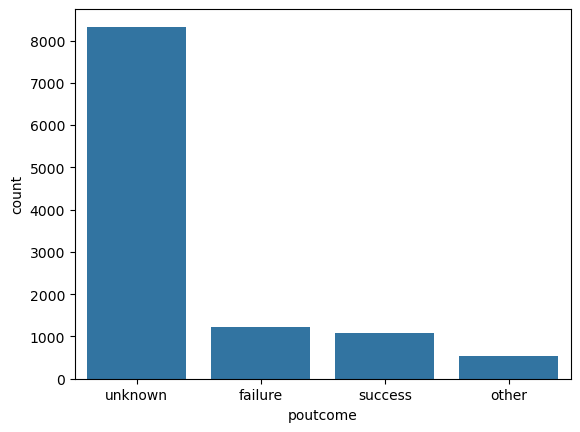

In [27]:
sns.barplot(data=df['poutcome'].value_counts())

<Axes: xlabel='loan', ylabel='duration'>

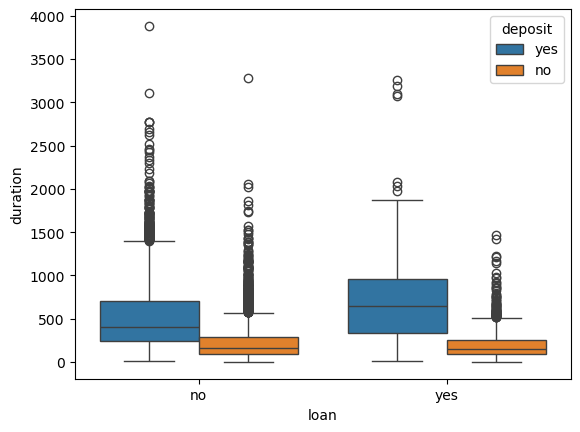

In [28]:
sns.boxplot(x='loan', y='duration', hue='deposit', data=df)

<Axes: xlabel='loan', ylabel='duration_winsorized'>

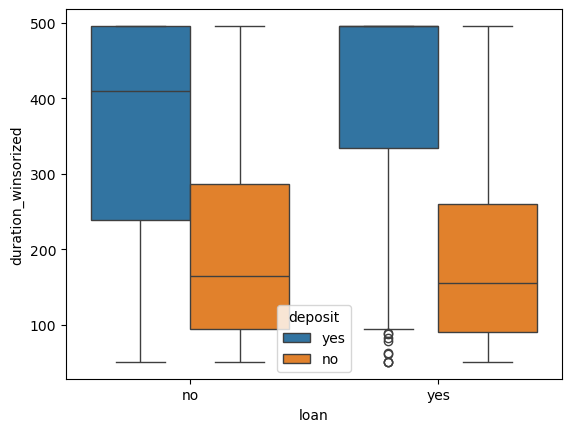

In [29]:
from scipy.stats.mstats import winsorize

df['duration_winsorized'] = winsorize(df['duration'], limits=(0.05, 0.25))

sns.boxplot(x='loan', y='duration_winsorized', hue='deposit', data=df)

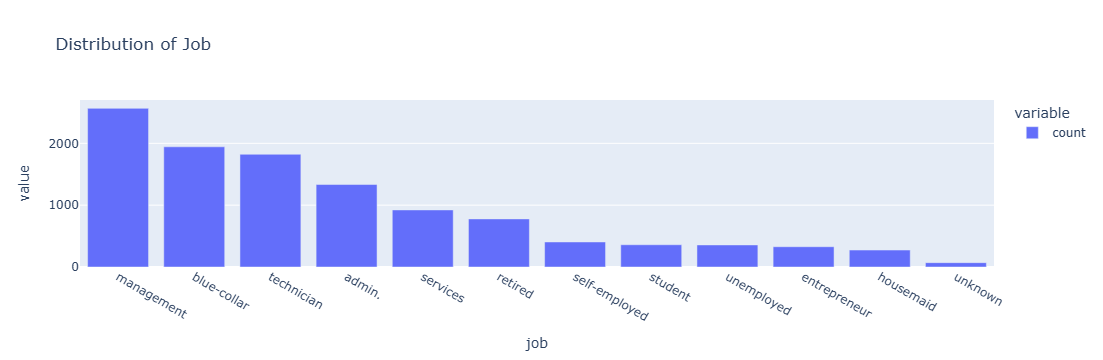

In [30]:
px.bar(df.job.value_counts(),title='Distribution of Job')

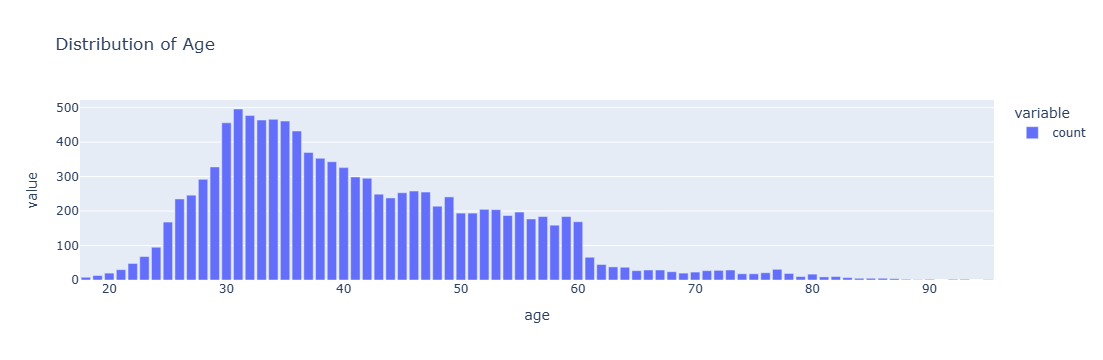

In [31]:
px.bar(df.age.value_counts(),title='Distribution of Age')

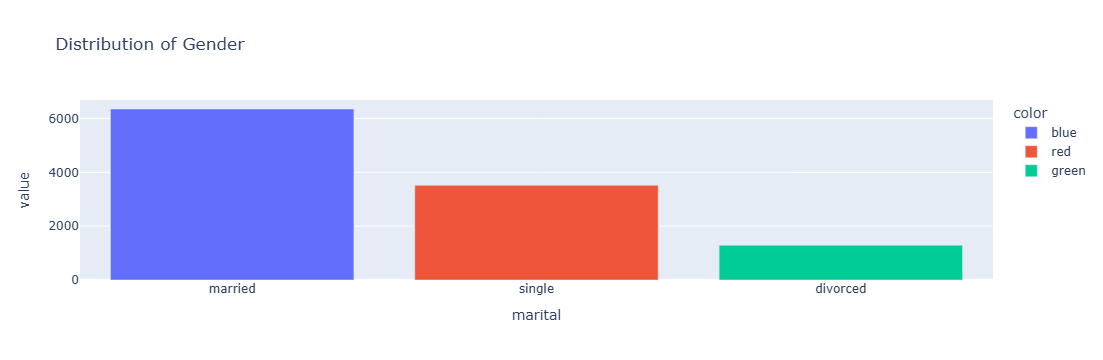

In [32]:
px.bar(df.marital.value_counts(),color=['blue','red', 'green'],title='Distribution of Gender')

<Axes: xlabel='poutcome', ylabel='balance'>

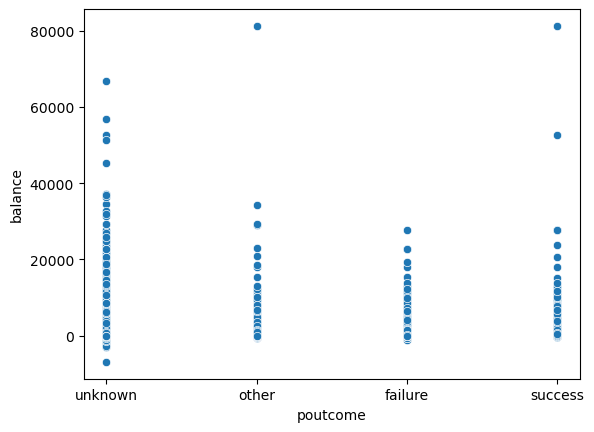

In [33]:
sns.scatterplot(df, x='poutcome', y='balance')

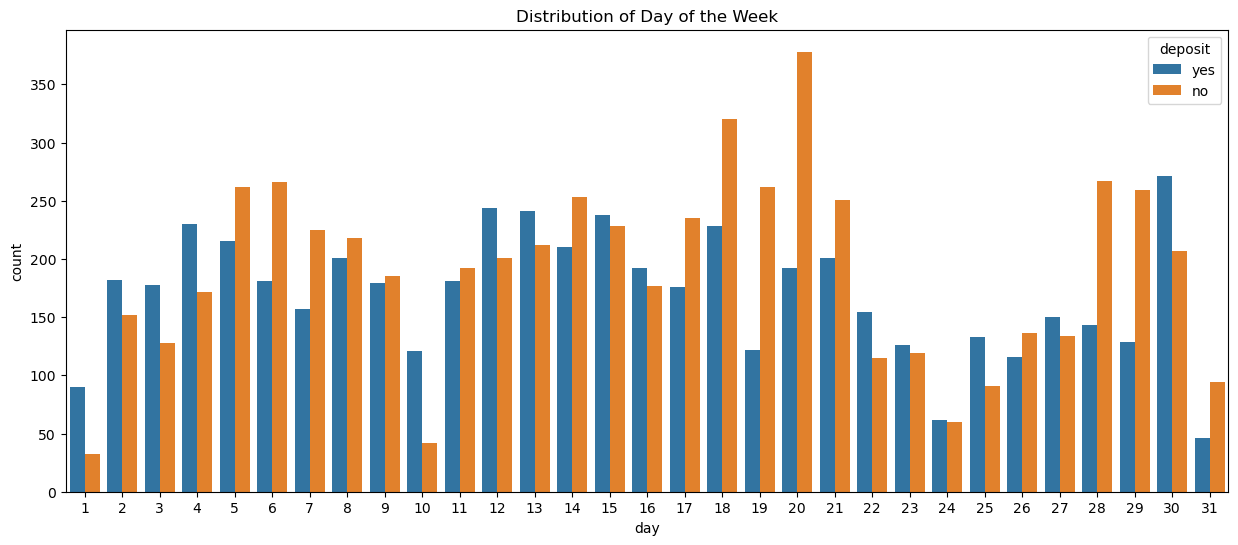

In [34]:
plt.figure(figsize=(15, 6))
sns.countplot(x='day', data=df, hue=df['deposit'])
plt.title('Distribution of Day of the Week')
plt.show()

<Axes: xlabel='month', ylabel='count'>

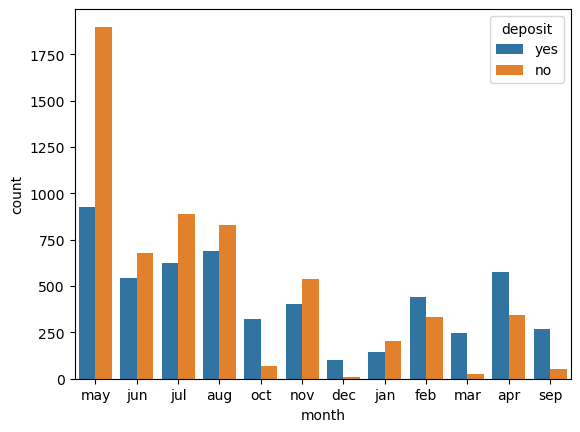

In [35]:
sns.countplot(x = df['month'], hue=df['deposit'])

<Axes: xlabel='duration', ylabel='balance'>

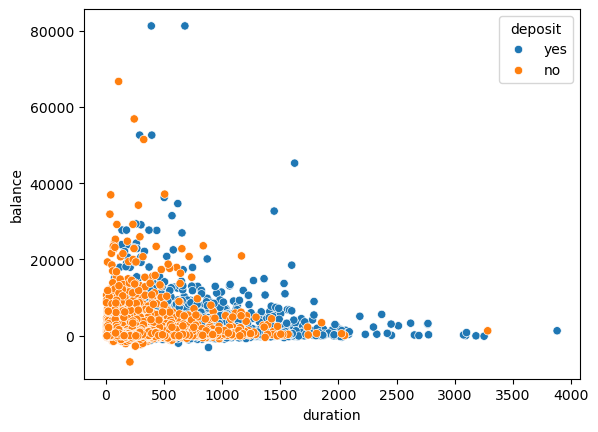

In [36]:
sns.scatterplot(x=df["duration"], y=df['balance'], hue=df['deposit'])

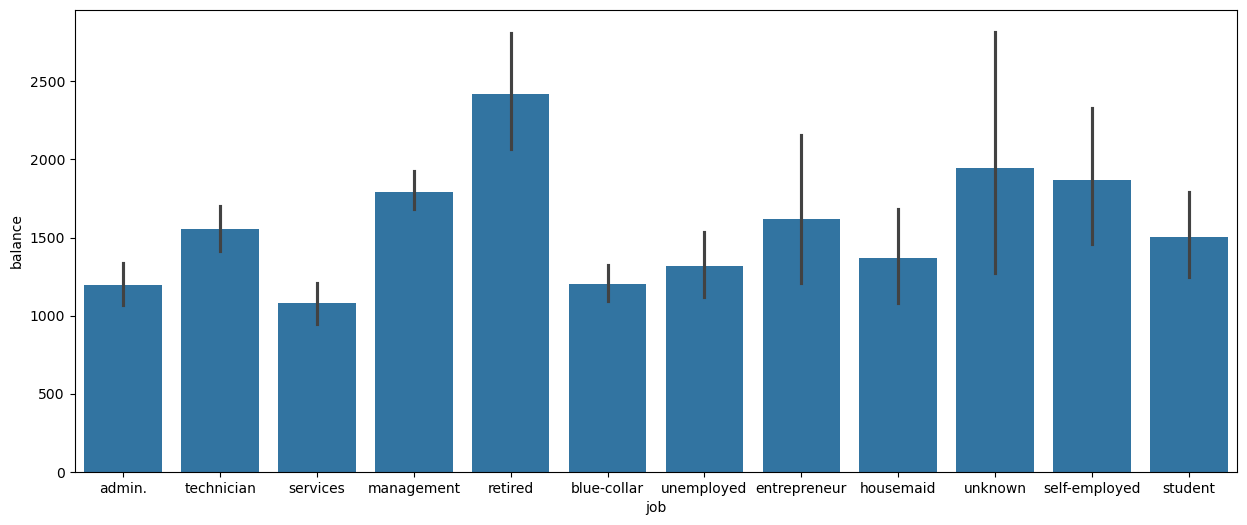

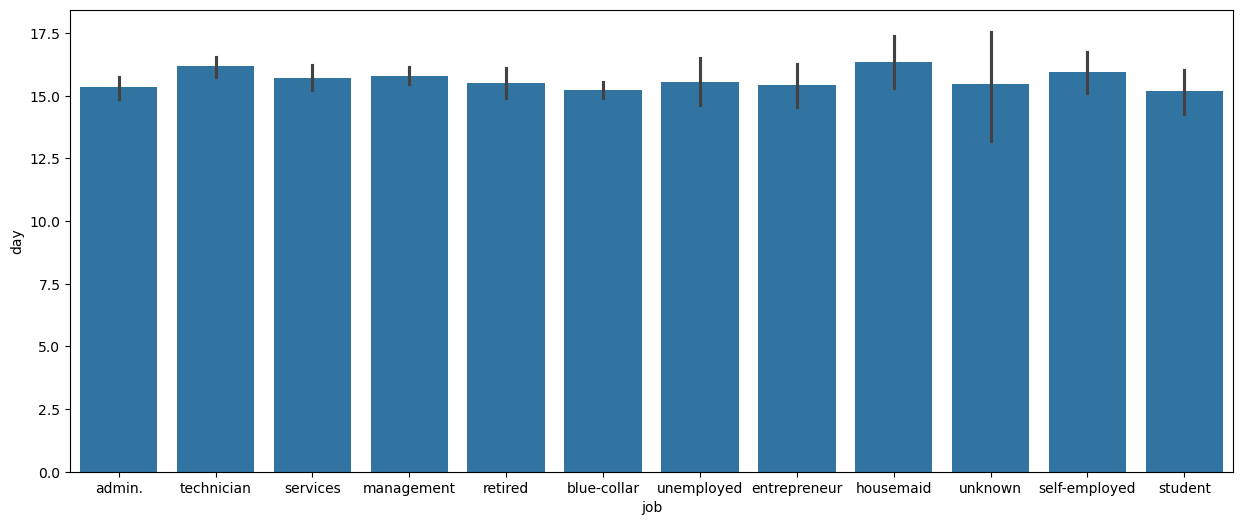

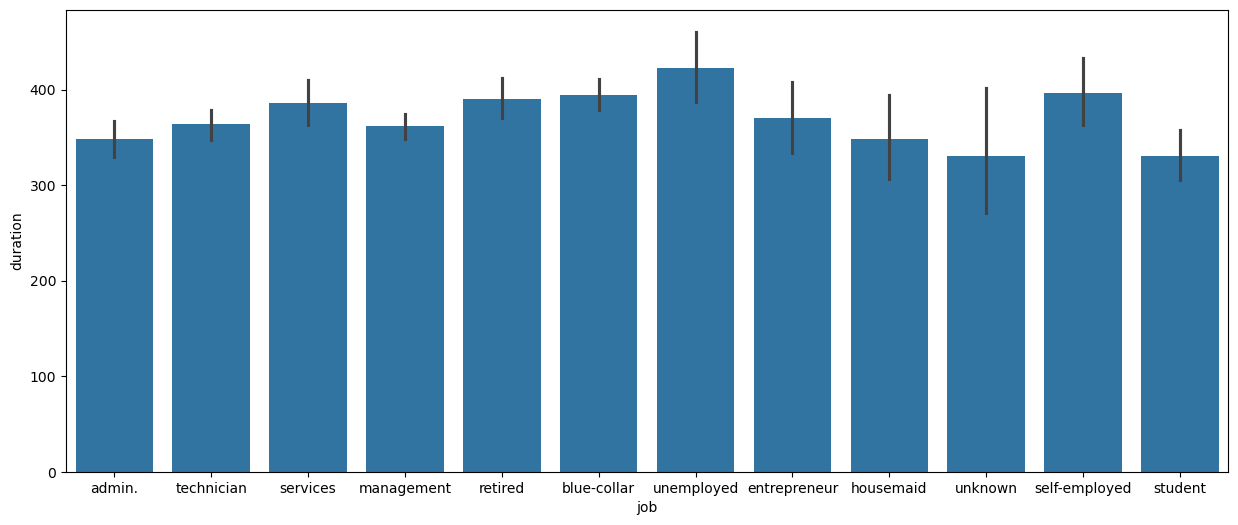

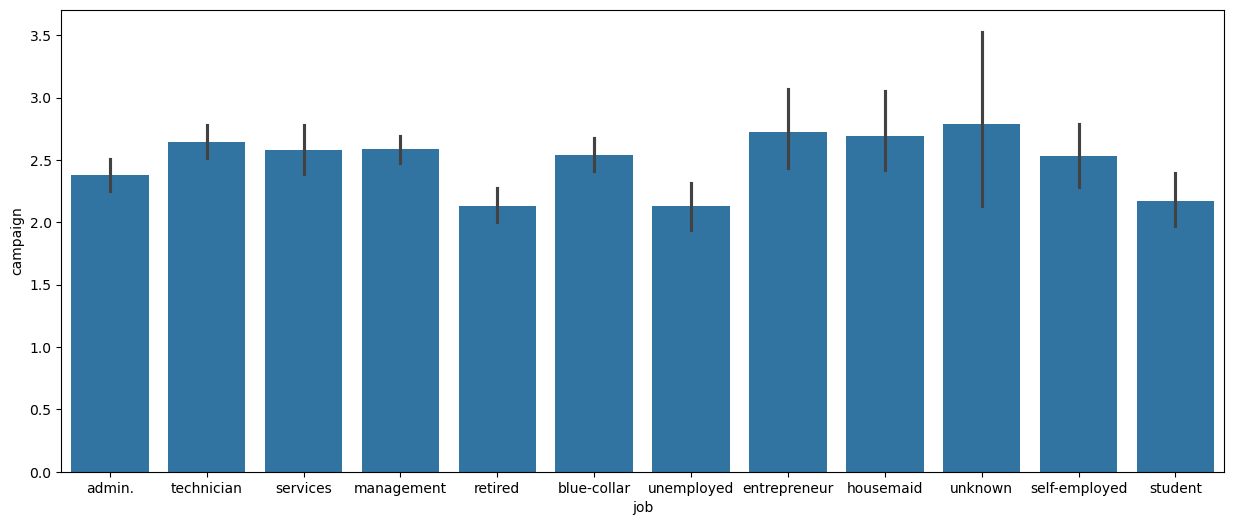

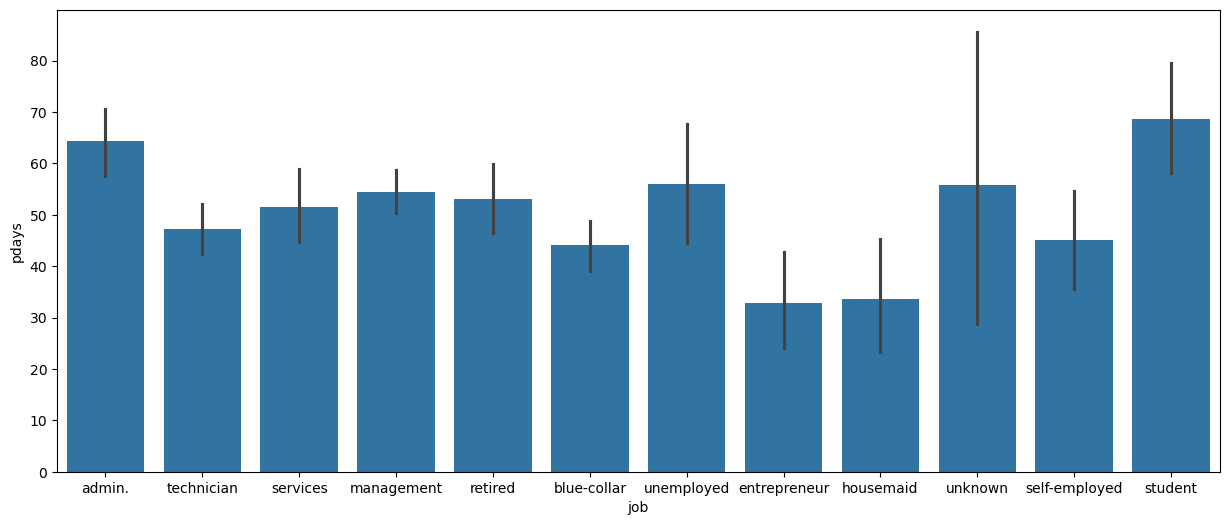

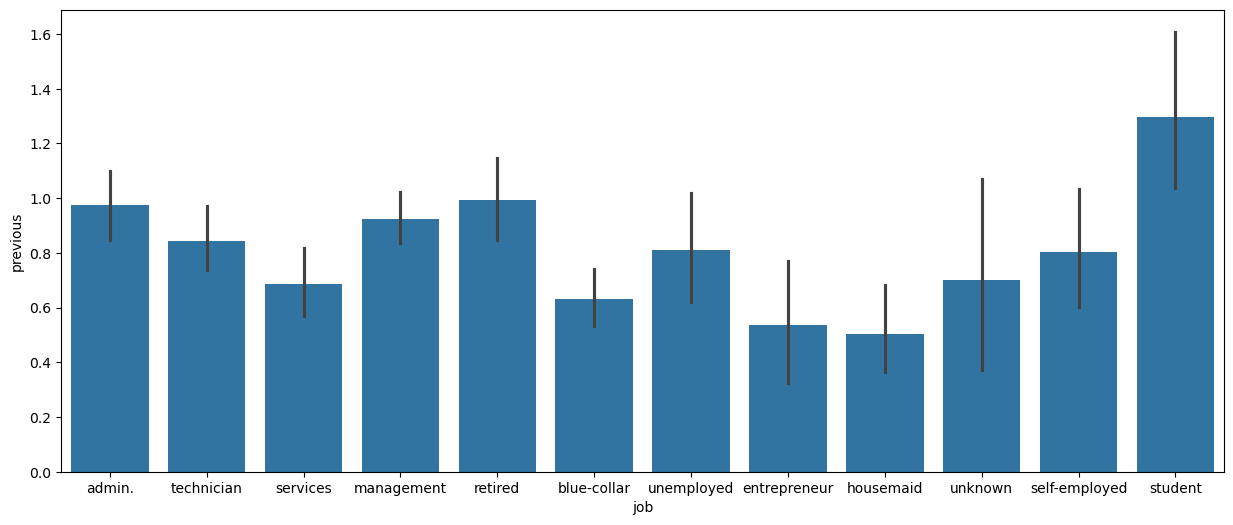

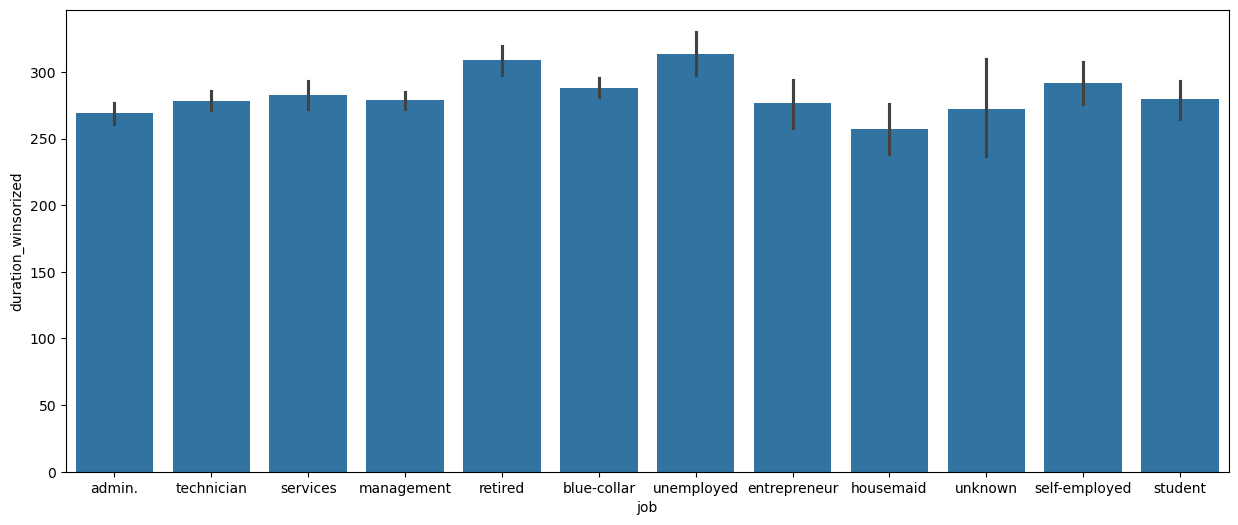

In [37]:
for i in df.select_dtypes(include="object").columns[:1]:
    for j in df.select_dtypes(exclude="object").columns[1:]:
        plt.figure(figsize=(15,6))
        sns.barplot(data=df, x=i, y=j)
        plt.show()

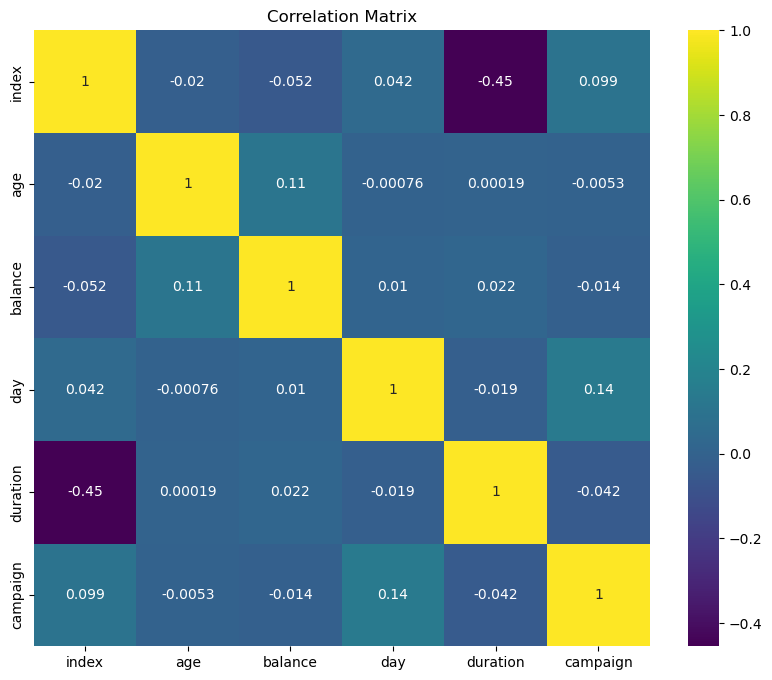

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Matrix')
plt.show()

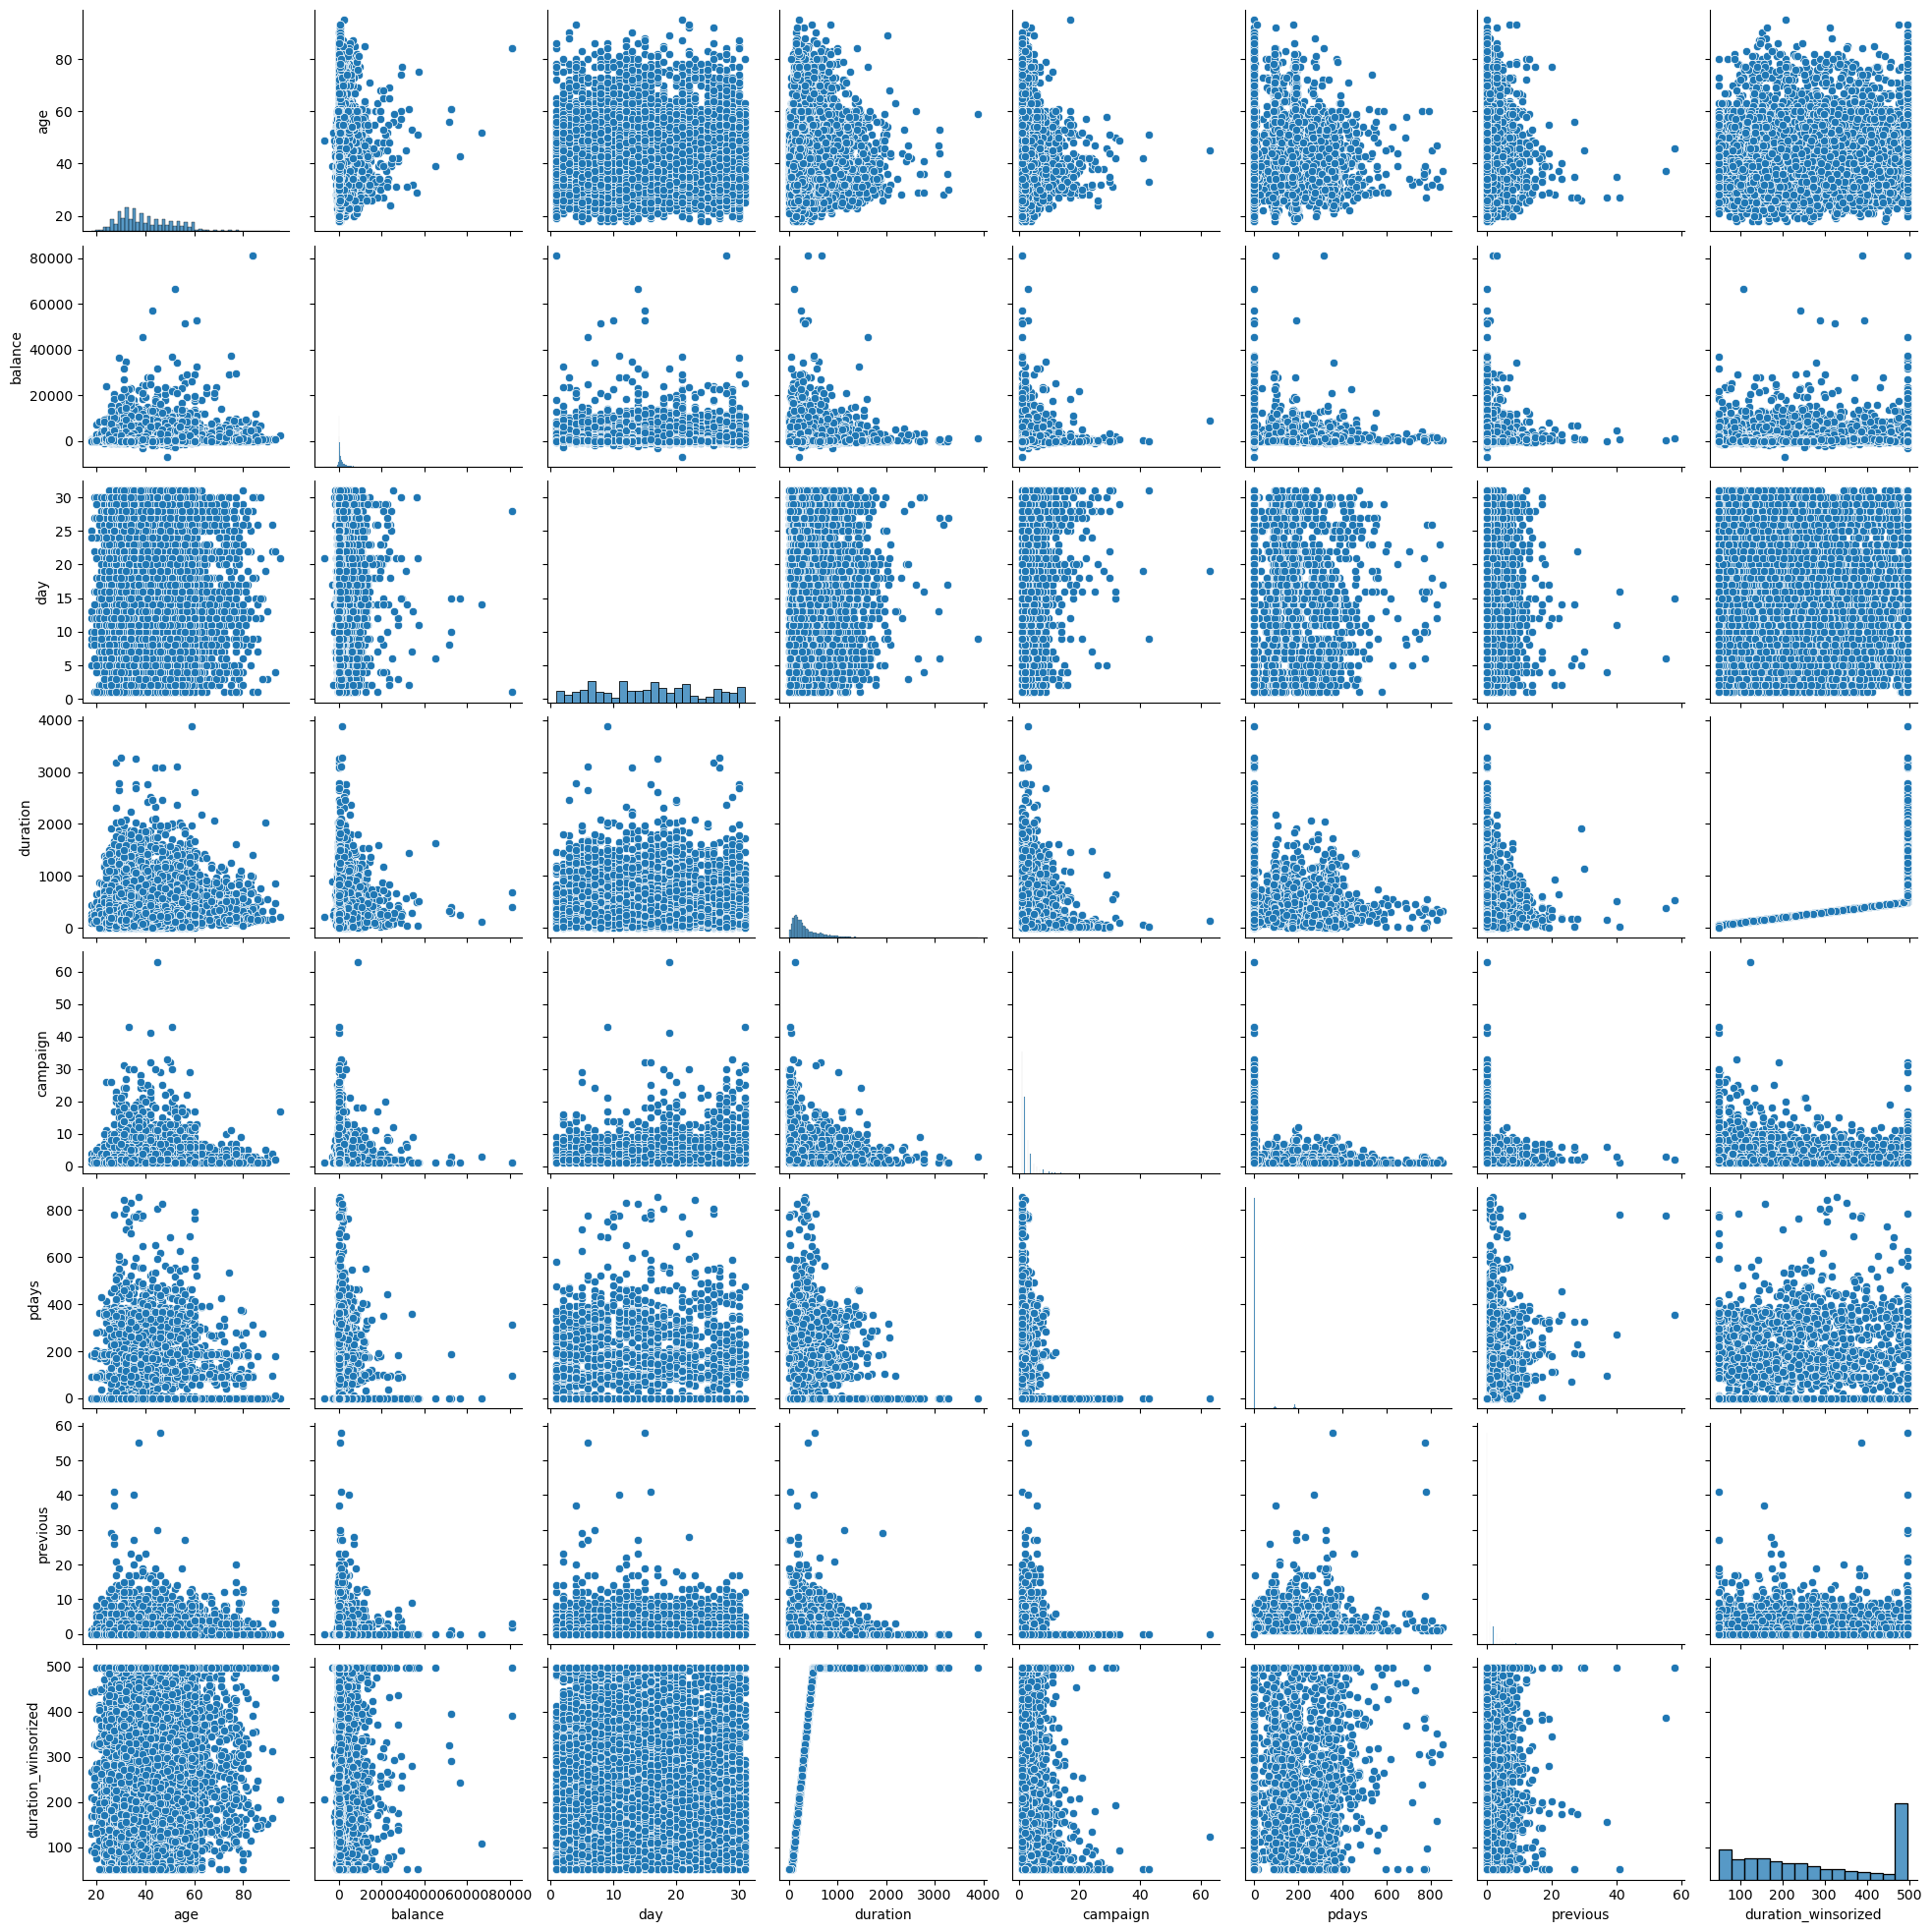

In [40]:
sns.pairplot(df)

In [42]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'duration_winsorized'],
      dtype='object')

In [43]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import scipy.stats as stats
import joblib
import os
from sklearn import metrics

In [48]:
X = df.drop(columns='deposit')
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [51]:
num_col = []
for i in X.select_dtypes(exclude='object'): #selecting the numerical features
    if X[i].nunique()>7:
        num_col.append(i)

In [53]:
one_hot_col = []
ordinal_col = []

for i in X.select_dtypes(include='object'): #selecting the categorical features
    print(X[i].unique())
    if X[i].nunique()>2:
        ordinal_col.append(i)
    else:
        one_hot_col.append(i)

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'other' 'failure' 'success']


In [55]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
ordinal_transformer = OrdinalEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat_onehot', categorical_transformer, one_hot_col),
        ('cat_ordinal', ordinal_transformer, ordinal_col)
    ]
)

In [56]:
pipelines = {
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=LogisticRegression())),
        ('classifier', LogisticRegression())
    ]),
    'sgd_classification': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=SGDClassifier())),
        ('classifier', SGDClassifier())
    ]),
    'decision_tree_classification': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=DecisionTreeClassifier())),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest_classification': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ])
}

# Define hyperparameters for each model, including number of features for RFE
param_grid = {
    'logistic_regression': {
        'feature_selection__n_features_to_select': [i for i in range(5,10,1)],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    'sgd_classification': {
        'feature_selection__n_features_to_select': [i for i in range(5,10,1)],
        'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
    },
    'decision_tree_classification': {
        'feature_selection__n_features_to_select': [5, 10, 15],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50]
    },
    'random_forest_classification': {
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50]
    }
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning for each model
best_models = {}

for name, pipeline in pipelines.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print()



Tuning hyperparameters for logistic_regression...
Best parameters: {'classifier__C': 100, 'feature_selection__n_features_to_select': 9}

Tuning hyperparameters for sgd_classification...
Best parameters: {'classifier__alpha': 0.001, 'feature_selection__n_features_to_select': 9}

Tuning hyperparameters for decision_tree_classification...
Best parameters: {'classifier__max_depth': 10, 'feature_selection__n_features_to_select': 10}

Tuning hyperparameters for random_forest_classification...
Best parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}



In [57]:
for name, model in best_models.items():
    print("_"*30)
    print("*"*10, name, "*"*10)
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')
    
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score", metrics.accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

______________________________
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 20.8 ms
Accuracy Score 0.7783251231527094
Model Size: 8862 Bytes
______________________________
********** sgd_classification **********
CPU times: total: 31.2 ms
Wall time: 21.5 ms
Accuracy Score 0.7751903269144649
Model Size: 9028 Bytes
______________________________
********** decision_tree_classification **********
CPU times: total: 15.6 ms
Wall time: 17.3 ms
Accuracy Score 0.800268696820421
Model Size: 284312 Bytes
______________________________
********** random_forest_classification **********
CPU times: total: 234 ms
Wall time: 252 ms
Accuracy Score 0.8280340349305867
Model Size: 57972511 Bytes


In [58]:
print("ML MODEL EVALUATION")
for name, model in best_models.items():
    print("_"*50)
    print("*"*15, name, "*"*15)
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score:- ", metrics.accuracy_score(y_test, y_test_pred))
    print("F-1 Score:- ",metrics.f1_score(y_test, y_test_pred,average= 'weighted'))
    print("Recall Score:- ",metrics.recall_score(y_test, y_test_pred,average= 'weighted'))

ML MODEL EVALUATION
__________________________________________________
*************** logistic_regression ***************
CPU times: total: 31.2 ms
Wall time: 19.3 ms
Accuracy Score:-  0.7783251231527094
F-1 Score:-  0.7781595551704527
Recall Score:-  0.7783251231527094
__________________________________________________
*************** sgd_classification ***************
CPU times: total: 15.6 ms
Wall time: 19.6 ms
Accuracy Score:-  0.7751903269144649
F-1 Score:-  0.7750951153206269
Recall Score:-  0.7751903269144649
__________________________________________________
*************** decision_tree_classification ***************
CPU times: total: 15.6 ms
Wall time: 21.5 ms
Accuracy Score:-  0.800268696820421
F-1 Score:-  0.8002979061725785
Recall Score:-  0.800268696820421
__________________________________________________
*************** random_forest_classification ***************
CPU times: total: 234 ms
Wall time: 240 ms
Accuracy Score:-  0.8280340349305867
F-1 Score:-  0.82809053088